In [2]:
import pandas as pd

start = pd.read_csv("../../data/yob2021.txt", index_col=0, sep=",", names=["Name", "Sex", "Rank"])
start.head()

,Sex,Rank
Name,,
Olivia,F,17728
Emma,F,15433
Charlotte,F,13285
Amelia,F,12952
Ava,F,12759


### Task 1

In [4]:
li = []
for year in range(2000, 2022):
    year_df = pd.read_csv(f"../../data/yob{year}.txt", index_col=0, sep=",", names=["Names", "Gender", "Number"])
    year_df["Year"] = year
    li.append(year_df)
df = pd.concat(li)
df

,Gender,Number,Year
Names,,,
Emily,F,25957,2000
Hannah,F,23085,2000
Madison,F,19968,2000
Ashley,F,17997,2000
Sarah,F,17708,2000
...,...,...,...
Zyeire,M,5,2021
Zyel,M,5,2021
Zyian,M,5,2021


### Task 2

In [14]:
def get_last_letter(name):
    return name[len(name) - 1]

df["last_letter"] = df.index.map(lambda x: get_last_letter(x))
df

,Gender,Number,Year,last_letter
Names,,,,
Emily,F,25957,2000,y
Hannah,F,23085,2000,h
Madison,F,19968,2000,n
Ashley,F,17997,2000,y
Sarah,F,17708,2000,h
...,...,...,...,...
Zyeire,M,5,2021,e
Zyel,M,5,2021,l
Zyian,M,5,2021,n


### Task 3

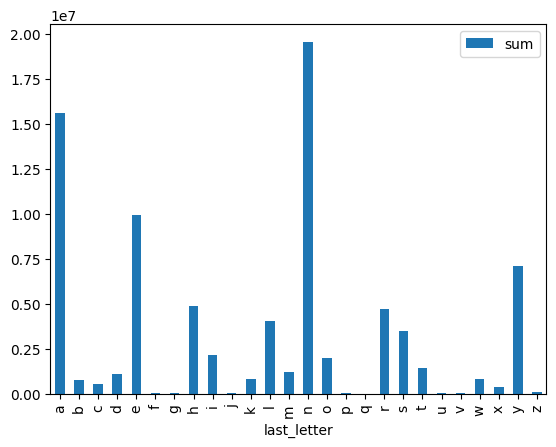

In [23]:
nums = df.groupby(["last_letter"])["Number"].agg(["sum"]).plot.bar()

### Task 4

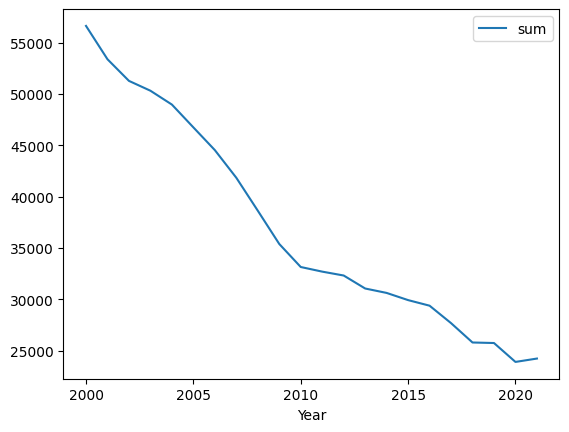

In [82]:
df_w = df[df["last_letter"] == "w"].groupby(["Year"])["Number"].agg(["sum"]).plot()


### Task 5

In [93]:
# df.drop(columns=["level_0", "index"], inplace=True)
df_index = df.reset_index()
df_multi_letter = df_index.groupby(["last_letter", "Year"])["Names"].count().unstack(0)
df_multi_letter

last_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
Year,,,,,,,,,,,,,,,,,,,,,
2000,7906,115,116,511,4181,62,102,1555,1622,44,...,26,975,1187,407,101,40,36,51,1877,164
2001,7915,104,121,487,4197,59,97,1680,1739,53,...,20,1006,1152,422,115,43,35,57,1956,150
2002,7932,113,118,495,4119,60,92,1784,1828,48,...,25,1046,1125,434,128,47,34,58,1960,144
2003,7919,112,122,491,4176,62,89,1902,1894,55,...,24,1076,1177,431,137,50,36,61,2035,152
2004,8111,122,125,483,4286,68,86,1981,2009,47,...,24,1074,1165,440,134,56,37,71,2084,151
2005,8138,114,121,476,4266,64,80,2148,2032,55,...,28,1147,1193,440,131,52,37,76,2134,160
2006,8439,120,105,505,4417,67,85,2353,2170,54,...,22,1199,1289,456,138,58,37,80,2192,183
2007,8506,129,124,496,4460,66,86,2478,2315,58,...,25,1243,1295,445,148,66,39,86,2208,184
2008,8266,119,114,503,4511,78,95,2529,2318,61,...,19,1263,1271,469,148,68,35,88,2272,183


<Axes: xlabel='Year'>

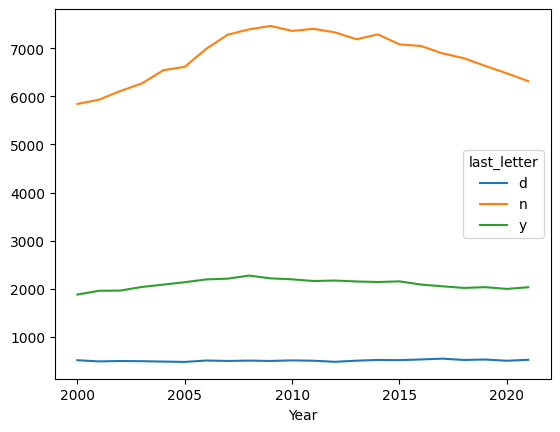

In [94]:
df_multi_letter.loc[:, (["d", "n", "y"])].plot()

### Task 6

In [135]:
df["first_letter"] = df.index.map(lambda x: x[0].lower())
df_letters = df.groupby(["first_letter", "last_letter"])["Year"].count()
df_letters



first_letter  last_letter
a             a              29151
              b                306
              c                340
              d               1084
              e              10677
                             ...  
z             u                 25
              v                 54
              x                  2
              y                868
              z                 11
Name: Year, Length: 617, dtype: int64

In [140]:
df_mapped = df_letters.reset_index().set_index(["first_letter", "last_letter"]).rename(columns={"Year": "Sum"})
# df_mapped.unstack(1)
df_mapped

Sum
first_letter last_letter       
a            a            29151
             b              306
             c              340
             d             1084
             e            10677
...                         ...
z            u               25
             v               54
             x                2
             y              868
             z               11

[617 rows x 1 columns]

<Axes: xlabel='first_letter', ylabel='last_letter'>

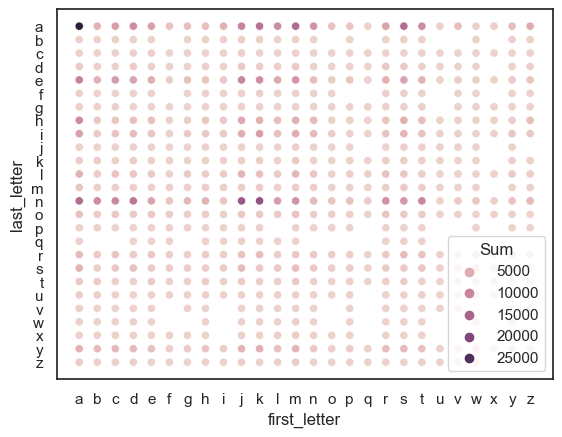

In [161]:
import seaborn as sns
sns.set(palette='deep', style='white', rc=None)
sns.scatterplot(data=df_mapped, x="first_letter", y="last_letter", hue="Sum")

### Task 7

In [182]:
heatmap = sns.heatmap(df_mapped.unstack(0), square=True, xticklabels=True, yticklabels=True)
heatmap.set(xlabel="first_letter", ylabel="last_letter")

AttributeError: 'NoneType' object has no attribute 'unstack'